# 1. Maximum Time Under Water

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
funds = pd.read_csv("funds.csv", delimiter=",", index_col=0, parse_dates=[0], dayfirst=False)
funds.head()

,BlackRock Multi-Asset Income Portfolio,iShares iBoxx $ High Yield Corporate Bond ETF,BlackRock Equity Dividend Fund,iShares 20+ Year Treasury Bond ETF,Vanguard Equity-Income Fund Investor Shares,Cash
2018-01-02,8.489755,66.994629,12.966429,112.028168,26.493795,21.902108
2018-01-03,8.520377,67.316780,13.011883,112.563812,26.571800,21.902960
2018-01-04,8.543343,67.431885,13.102796,112.545944,26.678167,21.903812
2018-01-05,8.551001,67.477905,13.170979,112.224556,26.805815,21.904663
2018-01-08,8.558652,67.424225,13.148252,112.153168,26.841272,21.907218


Let's have a first look at the dynamics of the series:

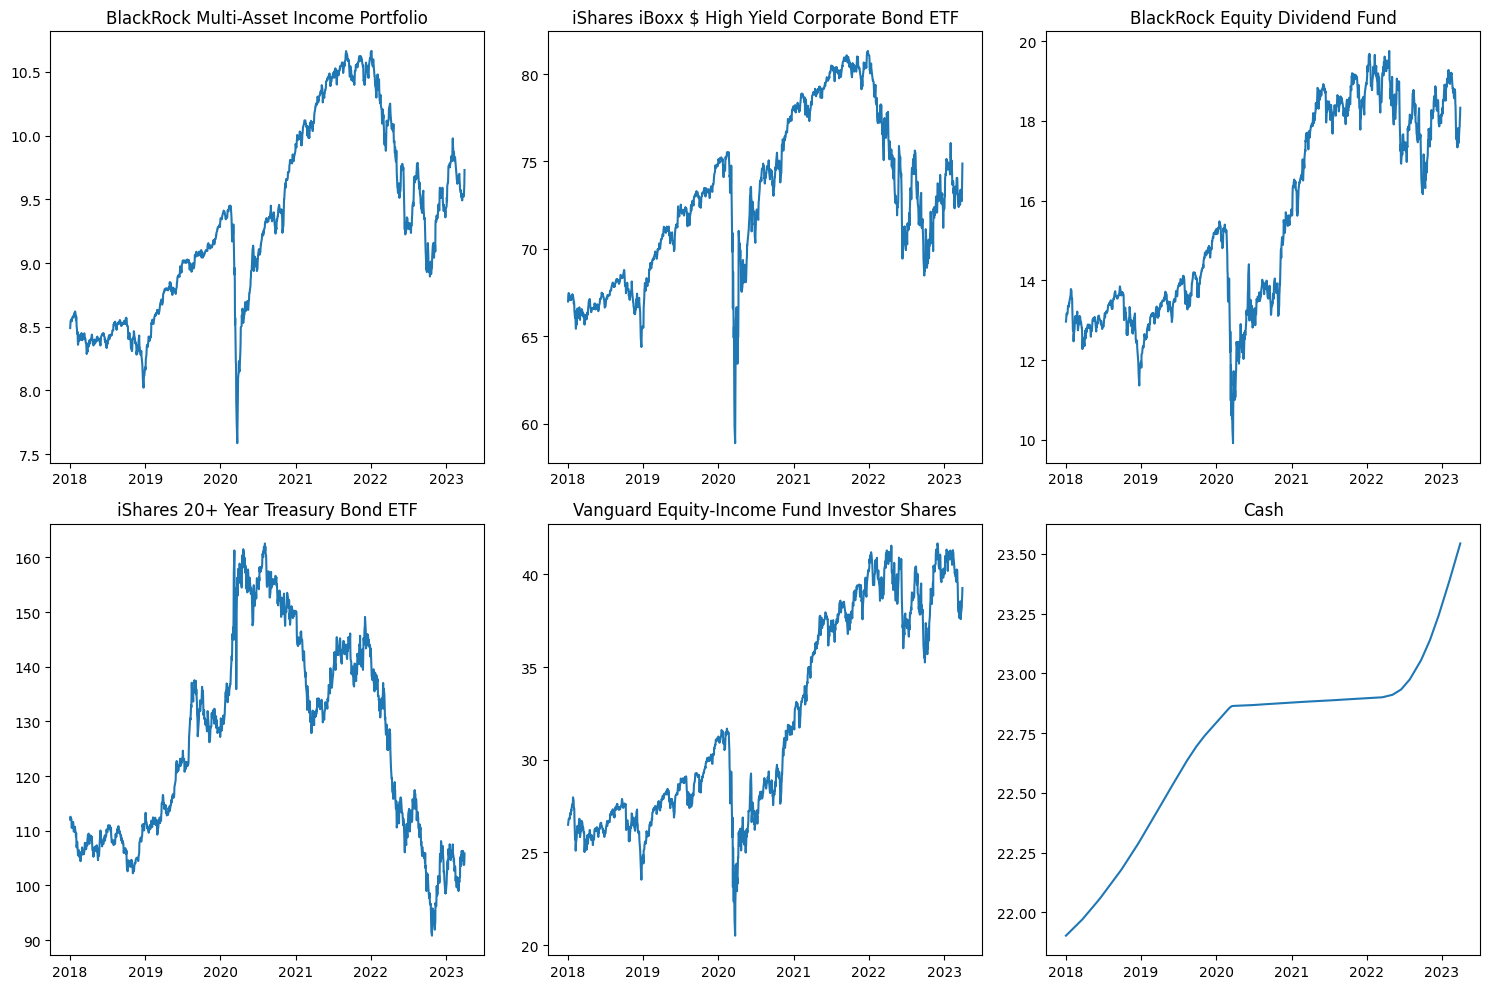

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot each column in separate axes
axs[0, 0].plot(funds.index, funds['BlackRock Multi-Asset Income Portfolio'])
axs[0, 0].set_title('BlackRock Multi-Asset Income Portfolio')

axs[0, 1].plot(funds.index, funds['iShares iBoxx $ High Yield Corporate Bond ETF'])
axs[0, 1].set_title('iShares iBoxx $ High Yield Corporate Bond ETF')

axs[0, 2].plot(funds.index, funds['BlackRock Equity Dividend Fund'])
axs[0, 2].set_title('BlackRock Equity Dividend Fund')

axs[1, 0].plot(funds.index, funds['iShares 20+ Year Treasury Bond ETF'])
axs[1, 0].set_title('iShares 20+ Year Treasury Bond ETF')

axs[1, 1].plot(funds.index, funds['Vanguard Equity-Income Fund Investor Shares'])
axs[1, 1].set_title('Vanguard Equity-Income Fund Investor Shares')

axs[1, 2].plot(funds.index, funds['Cash'])
axs[1, 2].set_title('Cash')

plt.tight_layout()
plt.show()

Create a function that returns the index of a value if that value is equal or larger than the threshold, otherwise returns `None`.

In [4]:
def firstHI(series, threshold, default_value=None):
    for index, value in enumerate(series):
        if float(value) >= threshold:
            return index
    return default_value

Next, create a function to return the maximum time under water of a time series by 

In [5]:
def TUW(series = pd.Series):
    
    HWM = series.cummax()
    
    # Peak value that appears the most (High Water Mark)
    
    longest_HWM = HWM.value_counts().idxmax()
    
    # Initial setup for the variables
    
    period = 0
    start_date = series.index[0]
    end_date = series.index[0]

    if (np.log(series).diff() < 0).any():
             
        start_date = series.index[firstHI(HWM, longest_HWM, default_value=None)]
        series = series.loc[start_date:]
        series = series.iloc[1:]
        end_date = series.index[firstHI(series, longest_HWM, default_value=None)] if firstHI(series, longest_HWM, default_value=None) is not None else series.index[-1]
        
        period = pd.to_datetime(end_date) - pd.to_datetime(start_date)
        period = period.days

        # Double check: In case the High Water Mark appears several times in a row, i.e several days after HWM with no loss
        
        while period < 2:
            start_date = end_date
            series = series.loc[start_date:]
            series = series.iloc[1:]       
            end_date = series.index[firstHI(series, longest_HWM, default_value=None)] if firstHI(series, longest_HWM, default_value=None) is not None else series.index[-1]
            period = pd.to_datetime(end_date) - pd.to_datetime(start_date)
            period = period.days
        
    else:
        period = None
            
    return period, start_date, end_date

Loop through each series (each asset's returns) as the input series for `TUW` function. If the period is `None` then we will receive a message *'There is no Time Under Water for ...'*; otherwise we will receive the number of days of the longest Time Under Water, as well as the start date and end date.

Expect: no Time Under Water for *Cash* because no dates with loss is observed for this asset.

In [6]:
for i in funds.columns:
    result = TUW(funds[i])
    if result[0] is None:
        print('-------------------------------------------------')
        print('There is no Time Under Water for', i)
        print('-------------------------------------------------')
    else:
        print('-------------------------------------------------')
        print('The longest periods under water for', i, 'is', result[0], 'days')
        print('The start date of longest TUW for', i, 'is', result[1])
        print('The end date of longest TUW for', i, 'is', result[2])
        print('-------------------------------------------------')

-------------------------------------------------
The longest periods under water for BlackRock Multi-Asset Income Portfolio is 451 days
The start date of longest TUW for BlackRock Multi-Asset Income Portfolio is 2022-01-04 00:00:00
The end date of longest TUW for BlackRock Multi-Asset Income Portfolio is 2023-03-31 00:00:00
-------------------------------------------------
-------------------------------------------------
The longest periods under water for iShares iBoxx $ High Yield Corporate Bond ETF is 459 days
The start date of longest TUW for iShares iBoxx $ High Yield Corporate Bond ETF is 2021-12-27 00:00:00
The end date of longest TUW for iShares iBoxx $ High Yield Corporate Bond ETF is 2023-03-31 00:00:00
-------------------------------------------------
-------------------------------------------------
The longest periods under water for BlackRock Equity Dividend Fund is 345 days
The start date of longest TUW for BlackRock Equity Dividend Fund is 2022-04-20 00:00:00
The end 